In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 1. Set up paths and load data
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Project root identified
project_root = "C:\\Users\\aneta\\PycharmProjects\\concrete_crack_detection"
print(f"Identified project root: {project_root}")

PROCESSED_DATA_DIR = os.path.join(project_root, 'data', 'processed')
print(f"Looking for processed data in: {PROCESSED_DATA_DIR}")

Current working directory: C:\Users\aneta\PycharmProjects\concrete_crack_detection\notebooks
Identified project root: C:\Users\aneta\PycharmProjects\concrete_crack_detection
Looking for processed data in: C:\Users\aneta\PycharmProjects\concrete_crack_detection\data\processed


In [10]:
# 1. Set up paths and load data
PROJECT_ROOT = "C:\\Users\\aneta\\PycharmProjects\\concrete_crack_detection"
PROCESSED_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'processed')

X_train = np.load(os.path.join(PROCESSED_DATA_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(PROCESSED_DATA_DIR, 'y_train.npy'))
X_val = np.load(os.path.join(PROCESSED_DATA_DIR, 'X_val.npy'))
y_val = np.load(os.path.join(PROCESSED_DATA_DIR, 'y_val.npy'))
X_test = np.load(os.path.join(PROCESSED_DATA_DIR, 'X_test.npy'))
y_test = np.load(os.path.join(PROCESSED_DATA_DIR, 'y_test.npy'))

In [11]:
# Saving of the plot visualization
def save_plot(fig, filename):
    """Save the current figure to a file."""
    save_dir = os.path.join(project_root, 'visualizations')
    os.makedirs(save_dir, exist_ok=True)
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    print(f"Saved plot to {filepath}")


In [12]:
# 2. Data Overview
print("Data shapes:")
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Data shapes:
Training set: (6400, 227, 227, 3), (6400,)
Validation set: (1600, 227, 227, 3), (1600,)
Test set: (2000, 227, 227, 3), (2000,)


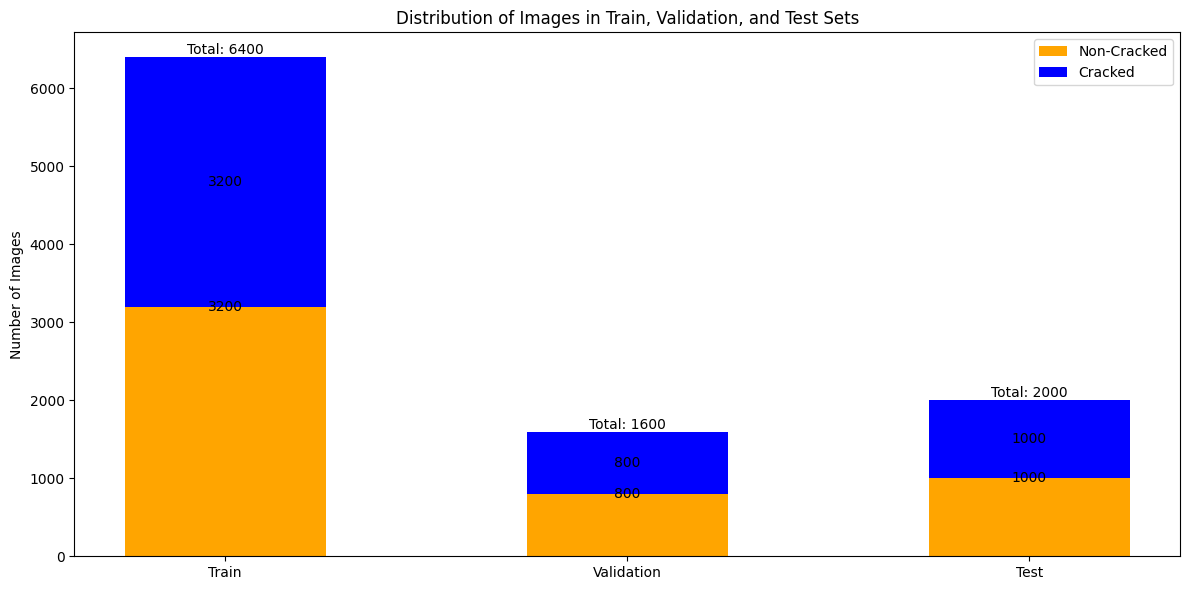

In [13]:
# 3. Visualize Data Distribution
# Count the number of cracked and non-cracked images in each set
train_cracked = np.sum(y_train)
train_non_cracked = len(y_train) - train_cracked
val_cracked = np.sum(y_val)
val_non_cracked = len(y_val) - val_cracked
test_cracked = np.sum(y_test)
test_non_cracked = len(y_test) - test_cracked

# Set up the data for plotting
datasets = ['Train', 'Validation', 'Test']
cracked = [train_cracked, val_cracked, test_cracked]
non_cracked = [train_non_cracked, val_non_cracked, test_non_cracked]

# Set up the bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Create the stacked bars
bar_width = 0.5
ax.bar(datasets, non_cracked, bar_width, label='Non-Cracked', color='orange')
ax.bar(datasets, cracked, bar_width, bottom=non_cracked, label='Cracked', color='blue')

# Customize the graph
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Train, Validation, and Test Sets')
ax.legend()

# Add value labels on the bars
for i, dataset in enumerate(datasets):
    total = cracked[i] + non_cracked[i]
    ax.text(i, total/2, f'{non_cracked[i]}', ha='center', va='center')
    ax.text(i, non_cracked[i] + cracked[i]/2, f'{cracked[i]}', ha='center', va='center')
    ax.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

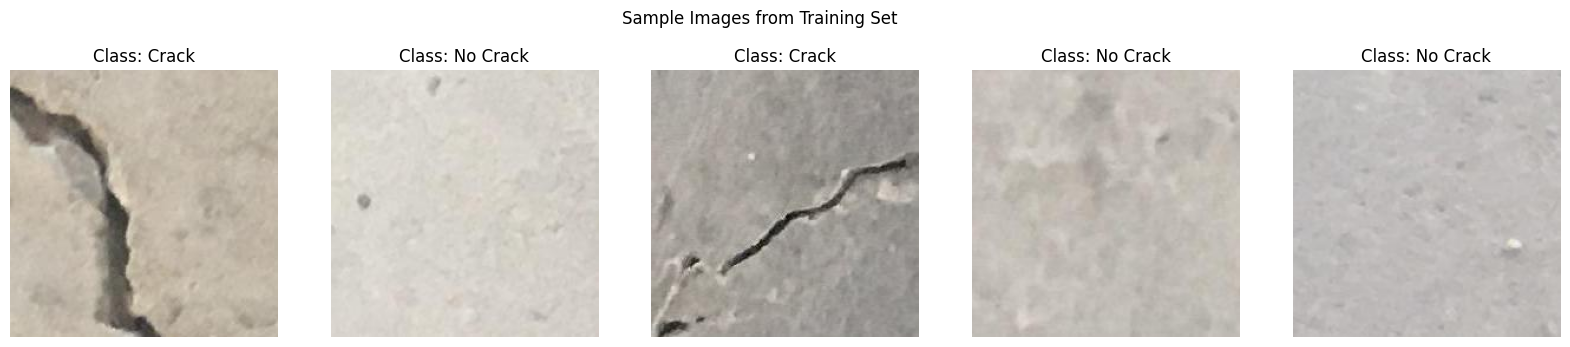

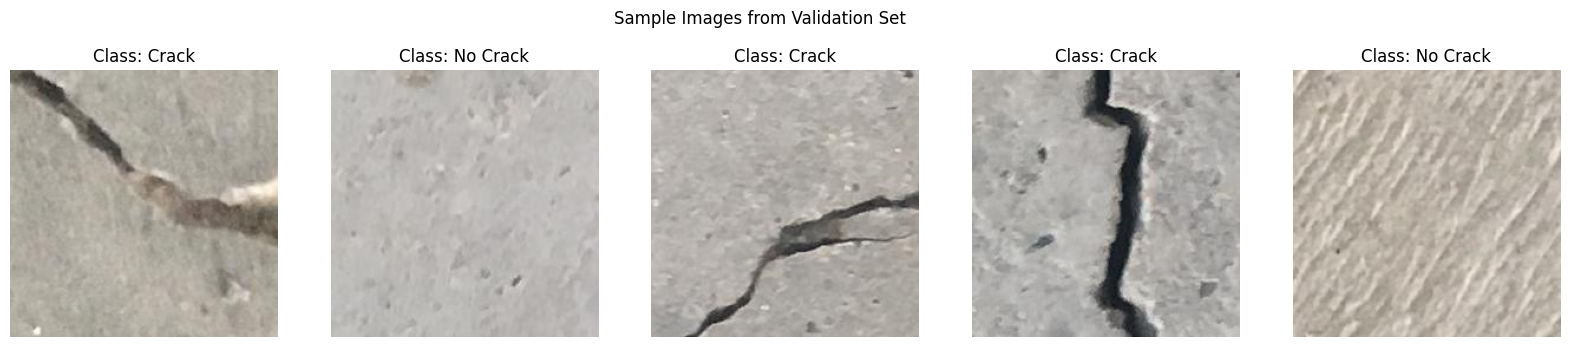

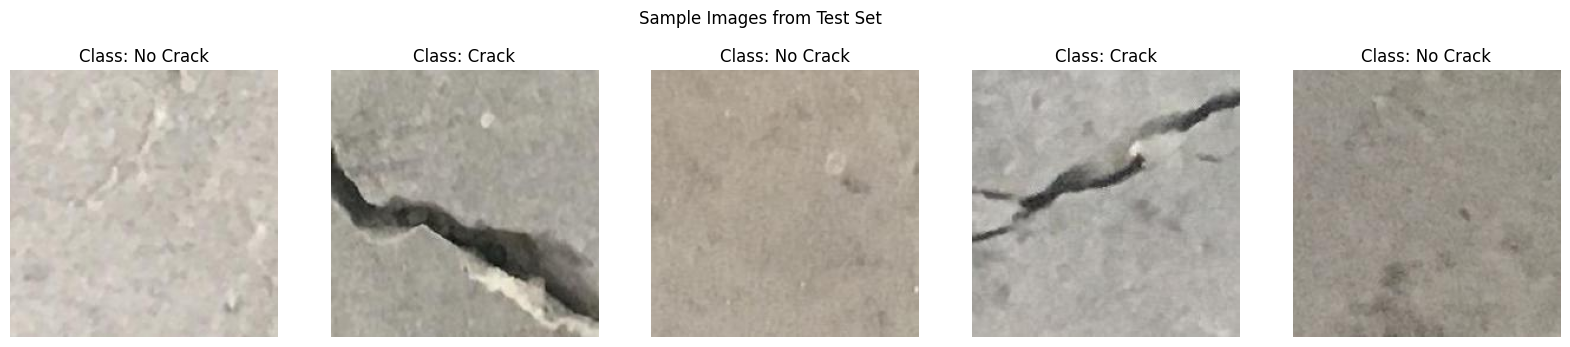

In [14]:
# 4. Sample Images
def plot_sample_images(X, y, set_name, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(num_samples):
        axes[i].imshow(X[i])
        axes[i].set_title(f"Class: {'Crack' if y[i] == 1 else 'No Crack'}")
        axes[i].axis('off')
    plt.suptitle(f'Sample Images from {set_name} Set')
    plt.show()

plot_sample_images(X_train, y_train, 'Training')
plot_sample_images(X_val, y_val, 'Validation')
plot_sample_images(X_test, y_test, 'Test')

